In [5]:
####### module import 
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
# import seaborn as sns
# Suppress Deprecation and Incorrect Usage Warnings 
import warnings
import scipy.io as sio 
import os
import scipy.signal as signal
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, Normalizer , MinMaxScaler

warnings.filterwarnings('ignore')

L_WINDOW = 2400


In [85]:
def get_best_score(model):
    
    print(model.best_score_)    
    print(model.best_params_)
    print(model.best_estimator_)
    
    return model.best_score_

In [86]:
path = '../ECoG_Handpose.mat'
data_set = sio.loadmat(path)['y']

columns = [f'CH{i}' for i in range(1, 68)]
df_ecog = pd.DataFrame(data_set.T, columns = columns)

In [87]:
df_ecog

,CH1,CH2,CH3,CH4,CH5,CH6,CH7,CH8,CH9,CH10,...,CH58,CH59,CH60,CH61,CH62,CH63,CH64,CH65,CH66,CH67
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.0,0.00000,0.000000,0.000000,0.000000,0.000000
1,0.000833,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.0,0.00000,0.000000,0.000000,0.000000,0.000000
2,0.001667,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.0,0.00000,0.000000,0.000000,0.000000,0.000000
3,0.002500,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.0,0.00000,0.000000,0.000000,0.000000,0.000000
4,0.003333,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.0,0.00000,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
507020,422.516667,-106697.578125,-86204.289062,-76535.585938,-103944.351562,-59508.328125,-39716.640625,-12350.508789,46311.046875,13856.023438,...,-65758.367188,-33892.039062,-4235.358887,51480.582031,0.0,0.70303,0.178975,0.153902,0.161574,0.234733
507021,422.517500,-106698.921875,-86203.906250,-76537.109375,-103945.375000,-59508.292969,-39717.875000,-12354.244141,46318.351562,13859.705078,...,-65760.468750,-33896.398438,-4240.333984,51477.101562,0.0,0.70303,0.178975,0.153902,0.161574,0.234733
507022,422.518333,-106701.960938,-86205.109375,-76535.445312,-103945.046875,-59511.664062,-39718.042969,-12355.633789,46322.660156,13859.116211,...,-65757.734375,-33894.804688,-4240.388672,51475.777344,0.0,0.70303,0.178975,0.153902,0.161574,0.234733
507023,422.519167,-106699.476562,-86202.367188,-76532.234375,-103945.843750,-59508.625000,-39713.183594,-12354.968750,46326.210938,13862.730469,...,-65757.828125,-33896.714844,-4241.463867,51473.503906,0.0,0.70303,0.178975,0.153902,0.161574,0.234733


In [88]:
df_ecog['seq'] = df_ecog.index
## Delete initial signal until open hand starts -> data_set[14496]
## Delete last signal after last open hand -> data_set[503855]
df_ecog = df_ecog.loc[14496:503855]

In [89]:
df_ecog

,CH1,CH2,CH3,CH4,CH5,CH6,CH7,CH8,CH9,CH10,...,CH59,CH60,CH61,CH62,CH63,CH64,CH65,CH66,CH67,seq
14496,12.080000,-108202.140625,-81322.898438,-77976.718750,-104424.265625,-61212.296875,-41506.968750,-15636.479492,42076.656250,7397.741211,...,-33652.546875,-1860.380371,50298.492188,3.0,0.278788,0.216749,0.202042,0.592130,0.247596,14496
14497,12.080833,-108205.492188,-81326.617188,-77978.343750,-104424.953125,-61214.015625,-41506.128906,-15641.880859,42067.187500,7393.749512,...,-33657.230469,-1866.030762,50294.148438,3.0,0.278788,0.216749,0.202042,0.592130,0.247596,14497
14498,12.081667,-108207.007812,-81324.851562,-77974.765625,-104421.312500,-61211.156250,-41501.972656,-15644.542969,42067.355469,7393.644043,...,-33654.542969,-1862.704102,50296.421875,3.0,0.278788,0.216749,0.202042,0.592130,0.247596,14498
14499,12.082500,-108211.562500,-81329.460938,-77972.625000,-104421.867188,-61209.351562,-41499.074219,-15648.054688,42066.386719,7392.619141,...,-33655.679688,-1863.915527,50297.058594,3.0,0.278788,0.216749,0.202042,0.592130,0.247596,14499
14500,12.083333,-108218.015625,-81333.429688,-77973.429688,-104422.171875,-61211.953125,-41504.625000,-15654.248047,42062.597656,7387.048340,...,-33658.152344,-1866.274902,50295.320312,3.0,0.278788,0.216749,0.202042,0.592130,0.247596,14500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
503851,419.875833,-106659.976562,-86178.281250,-76560.515625,-103994.914062,-59569.429688,-39748.664062,-12413.689453,46459.894531,14251.365234,...,-33858.148438,-4195.753418,51505.351562,3.0,0.715151,0.188290,0.161196,0.165741,0.229008,503851
503852,419.876667,-106659.437500,-86175.078125,-76558.687500,-103995.867188,-59571.429688,-39751.570312,-12412.623047,46461.718750,14261.977539,...,-33856.820312,-4194.428711,51506.984375,3.0,0.715151,0.188290,0.161196,0.165741,0.229008,503852
503853,419.877500,-106657.125000,-86174.109375,-76558.335938,-103997.781250,-59574.480469,-39753.339844,-12410.500000,46457.882812,14267.623047,...,-33858.328125,-4197.152832,51505.242188,3.0,0.715151,0.188290,0.161196,0.165741,0.229008,503853
503854,419.878333,-106659.507812,-86172.148438,-76555.960938,-103995.789062,-59574.023438,-39753.062500,-12411.837891,46455.554688,14269.843750,...,-33857.562500,-4196.998535,51505.546875,3.0,0.715151,0.188290,0.161196,0.165741,0.229008,503854


In [90]:
df_relax = df_ecog[df_ecog['CH62'] == 0]
df_fist = df_ecog[df_ecog['CH62'] == 1]
df_peace = df_ecog[df_ecog['CH62'] == 2]
df_open_hand = df_ecog[df_ecog['CH62'] == 3]


In [91]:
## Separate raw data into each paradigm info dataset
df_separated_ecog = df_ecog[~df_ecog['CH62'].eq(df_ecog['CH62'].shift())]

In [92]:
df_separated_ecog

,CH1,CH2,CH3,CH4,CH5,CH6,CH7,CH8,CH9,CH10,...,CH59,CH60,CH61,CH62,CH63,CH64,CH65,CH66,CH67,seq
14496,12.08,-108202.140625,-81322.898438,-77976.718750,-104424.265625,-61212.296875,-41506.968750,-15636.479492,42076.656250,7397.741211,...,-33652.546875,-1860.380371,50298.492188,3.0,0.278788,0.216749,0.202042,0.592130,0.247596,14496
16896,14.08,-108152.773438,-81324.312500,-77933.632812,-104431.515625,-61238.066406,-41592.246094,-15377.888672,41918.359375,7514.019043,...,-33705.449219,-1821.377930,50302.605469,0.0,0.383838,0.037438,0.027717,0.425926,0.022676,16896
20256,16.88,-108174.929688,-81416.750000,-77865.562500,-104399.984375,-61153.183594,-41488.078125,-15177.732422,41990.632812,7525.371582,...,-33660.777344,-1783.683594,50362.246094,1.0,0.488889,0.055937,0.061269,0.337500,0.065760,20256
22704,18.92,-108091.382812,-81404.398438,-77825.171875,-104355.132812,-61162.683594,-41490.156250,-15430.048828,42022.488281,7506.597168,...,-33660.843750,-1721.542480,50370.984375,0.0,0.559596,0.932638,0.670314,0.976852,0.973948,22704
26112,21.76,-108159.867188,-81523.789062,-77786.125000,-104301.765625,-61182.566406,-41552.757812,-15639.195312,42167.945312,7414.803223,...,-33645.898438,-1726.659668,50363.164062,3.0,0.678788,0.037002,0.064187,0.256944,0.030060,26112
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
489888,408.24,-106647.867188,-86164.367188,-76503.218750,-103992.015625,-59608.824219,-39592.398438,-11119.878906,46118.863281,14174.382812,...,-33641.570312,-4055.402832,51542.906250,3.0,0.771717,0.127745,0.134938,0.184259,0.229008,489888
492336,410.28,-106579.132812,-86117.921875,-76499.203125,-103983.742188,-59589.531250,-39620.496094,-11236.722656,46164.382812,14287.906250,...,-33721.121094,-4111.692383,51511.421875,0.0,0.765657,0.127079,0.132750,0.178704,0.238550,492336
495456,412.88,-106580.992188,-86109.476562,-76496.023438,-103928.382812,-59469.421875,-39541.371094,-11595.589844,46360.417969,14165.495117,...,-33780.175781,-4116.058105,51502.656250,1.0,0.763636,0.129741,0.131291,0.174537,0.238550,495456
497904,414.92,-106641.593750,-86134.140625,-76528.132812,-103987.437500,-59556.972656,-39647.660156,-12000.220703,46718.925781,14245.887695,...,-33814.769531,-4131.269531,51501.851562,0.0,0.276768,0.983367,0.712619,0.962500,0.685115,497904


In [94]:
## Find out 2400 sample time will not perfectly match next paradigm info
df_separated_ecog['seq'] - df_separated_ecog['seq'].shift()

14496        NaN
16896     2400.0
20256     3360.0
22704     2448.0
26112     3408.0
           ...  
489888    2784.0
492336    2448.0
495456    3120.0
497904    2448.0
501408    3504.0
Name: seq, Length: 179, dtype: float64

In [136]:
## Fix all data window size to 2400(L_WINDOW)
turning_point_list = df_separated_ecog['seq'].to_list()
temp_period_200 = [list(np.arange(start_seq, start_seq+L_WINDOW)) for start_seq in turning_point_list]
period_200 = [] 
for list_ in temp_period_200:
    period_200.extend(list_)
    
df_fixed_size = df_ecog.loc[period_200]
# df_fixed_size = df_fixed_size.reset_index()
# df_fixed_size['seq'] = df_fixed_size.index

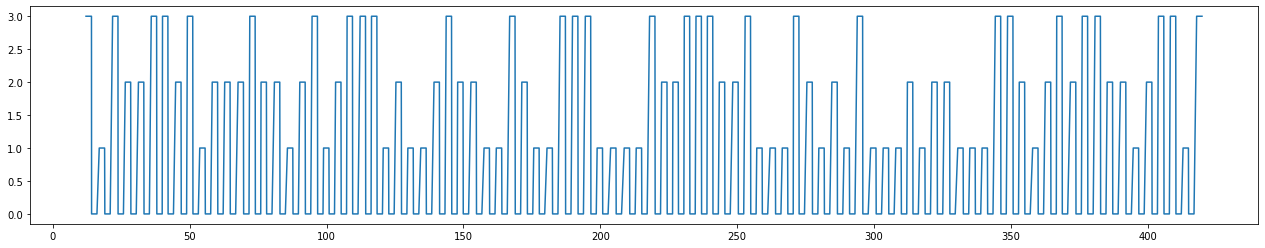

In [137]:
# Change in Paradigm Info over time
plt.figure(figsize=(22,4 ))
plt.plot(df_fixed_size['CH1'], df_fixed_size['CH62'])
plt.show() 

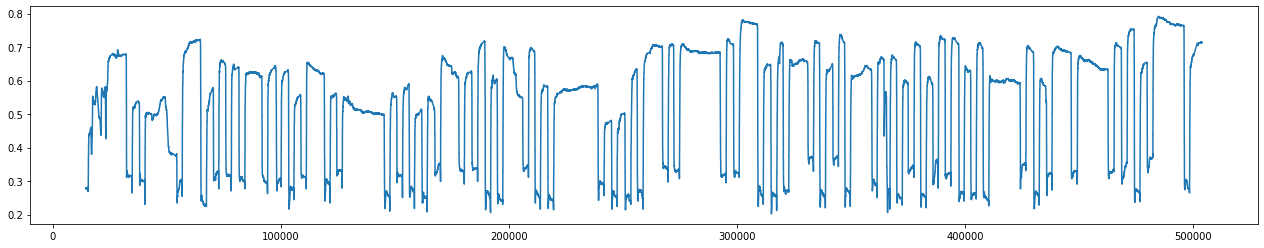

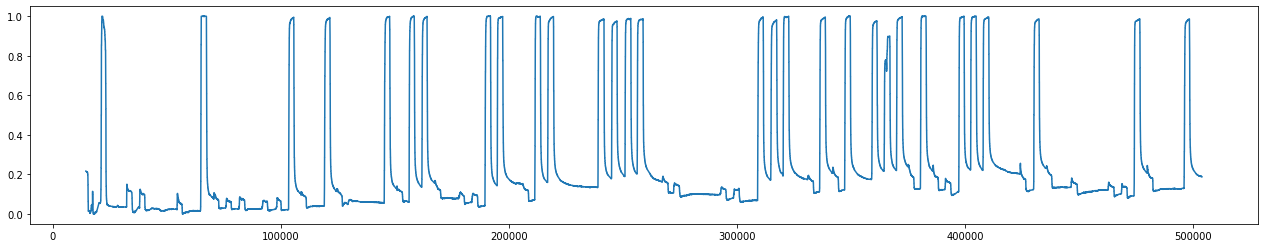

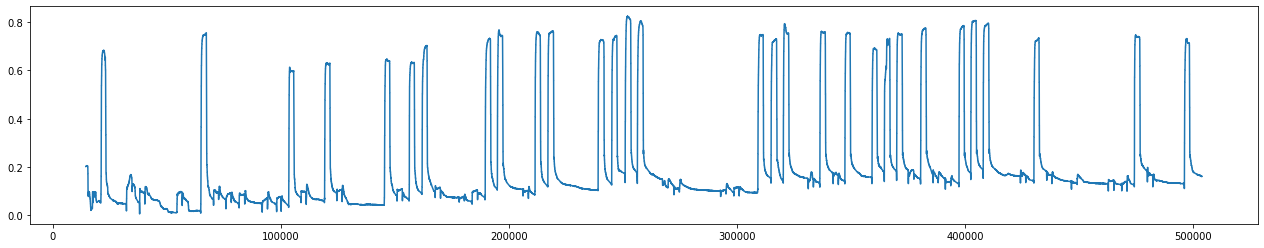

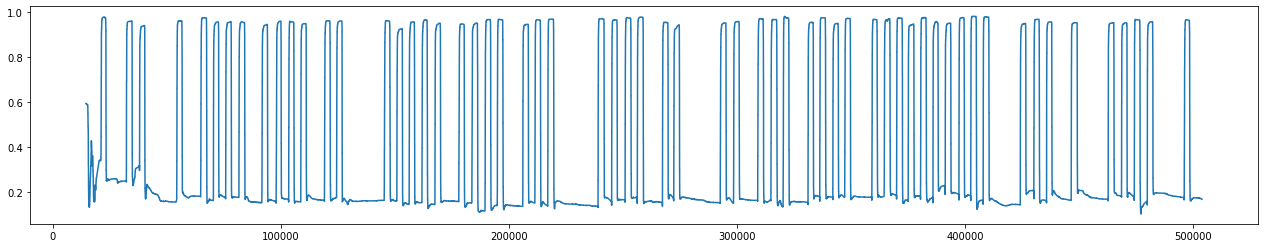

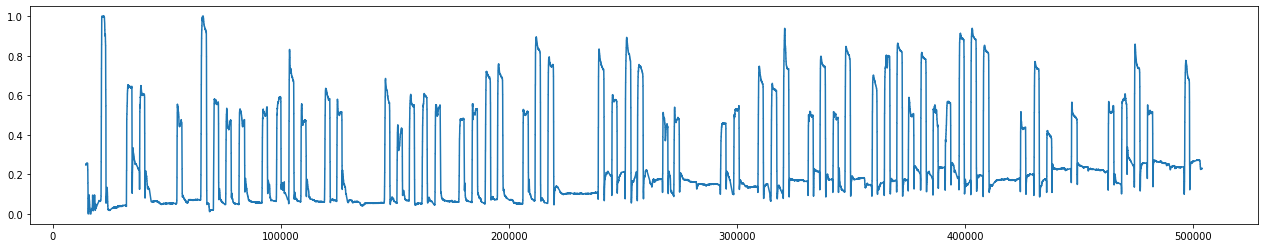

In [138]:
# Change in Finger Movement over time
hand_list = [df_fixed_size['CH63'], df_fixed_size['CH64'], df_fixed_size['CH65'], df_fixed_size['CH66'], df_fixed_size['CH67']]

for data in hand_list:
    plt.figure(figsize=(22,4 ))
    plt.plot(data)
    plt.show()

## Based on, finger movement graphs, 
## we can set thresold of each finger's spike is : 0.4, 0.4, 0.4, 0.4, 0.3 
## we add according features, 1 if over threshold, 0 if under it.

In [139]:
def set_feature(value, threshold):
    if value > threshold:
        return 1
    else:
        return 0
    
df_fixed_size['thumb'] = df_fixed_size['CH63'].apply(set_feature, args=(0.4,))
df_fixed_size['index'] = df_fixed_size['CH64'].apply(set_feature, args=(0.4,))
df_fixed_size['middle'] = df_fixed_size['CH65'].apply(set_feature, args=(0.4,))
df_fixed_size['ring'] = df_fixed_size['CH66'].apply(set_feature, args=(0.4,))
df_fixed_size['little'] = df_fixed_size['CH67'].apply(set_feature, args=(0.3,))

In [140]:
df_fixed_size

,CH1,CH2,CH3,CH4,CH5,CH6,CH7,CH8,CH9,CH10,...,CH64,CH65,CH66,CH67,seq,thumb,index,middle,ring,little
14496,12.080000,-108202.140625,-81322.898438,-77976.718750,-104424.265625,-61212.296875,-41506.968750,-15636.479492,42076.656250,7397.741211,...,0.216749,0.202042,0.592130,0.247596,14496,0,0,0,1,0
14497,12.080833,-108205.492188,-81326.617188,-77978.343750,-104424.953125,-61214.015625,-41506.128906,-15641.880859,42067.187500,7393.749512,...,0.216749,0.202042,0.592130,0.247596,14497,0,0,0,1,0
14498,12.081667,-108207.007812,-81324.851562,-77974.765625,-104421.312500,-61211.156250,-41501.972656,-15644.542969,42067.355469,7393.644043,...,0.216749,0.202042,0.592130,0.247596,14498,0,0,0,1,0
14499,12.082500,-108211.562500,-81329.460938,-77972.625000,-104421.867188,-61209.351562,-41499.074219,-15648.054688,42066.386719,7392.619141,...,0.216749,0.202042,0.592130,0.247596,14499,0,0,0,1,0
14500,12.083333,-108218.015625,-81333.429688,-77973.429688,-104422.171875,-61211.953125,-41504.625000,-15654.248047,42062.597656,7387.048340,...,0.216749,0.202042,0.592130,0.247596,14500,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
503803,419.835833,-106609.062500,-86134.500000,-76524.062500,-103967.054688,-59538.742188,-39704.820312,-12390.527344,46492.519531,14336.199219,...,0.187625,0.161196,0.166204,0.230916,503803,1,0,0,0,0
503804,419.836667,-106611.585938,-86137.242188,-76525.468750,-103966.726562,-59537.246094,-39705.160156,-12392.688477,46486.761719,14341.008789,...,0.187625,0.161196,0.166204,0.230916,503804,1,0,0,0,0
503805,419.837500,-106617.148438,-86138.882812,-76528.992188,-103966.851562,-59536.718750,-39706.964844,-12393.835938,46482.066406,14338.536133,...,0.187625,0.161196,0.166204,0.230916,503805,1,0,0,0,0
503806,419.838333,-106619.523438,-86139.796875,-76527.875000,-103966.343750,-59537.445312,-39710.367188,-12393.626953,46480.437500,14331.439453,...,0.187625,0.161196,0.166204,0.230916,503806,1,0,0,0,0


# We can guess when finger movement is open hand, strong electrical signal is emitted.

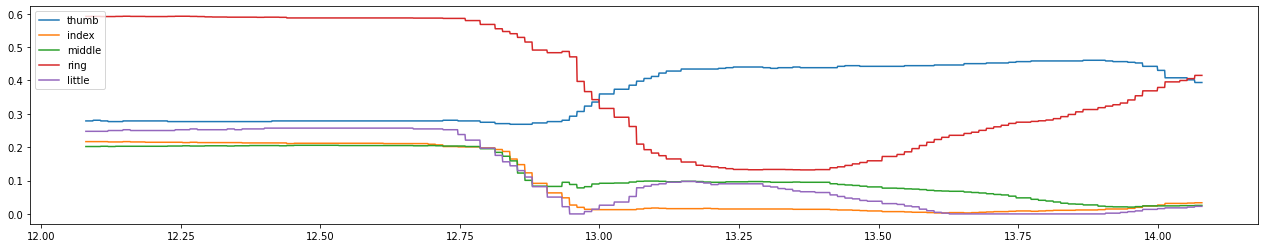

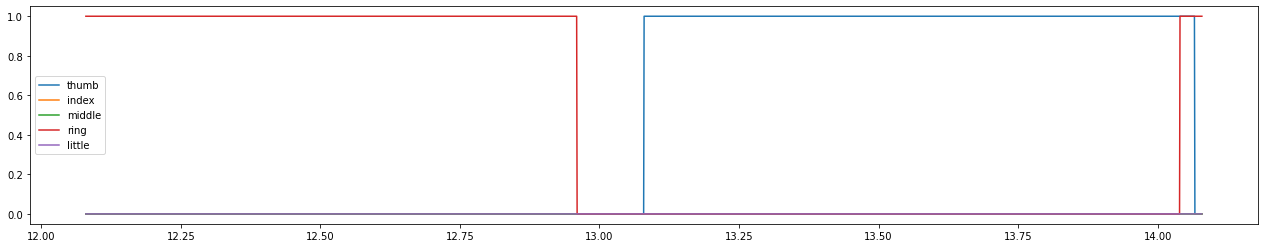

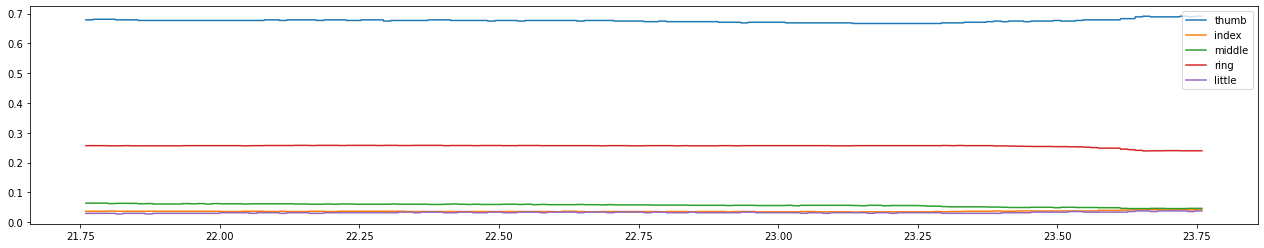

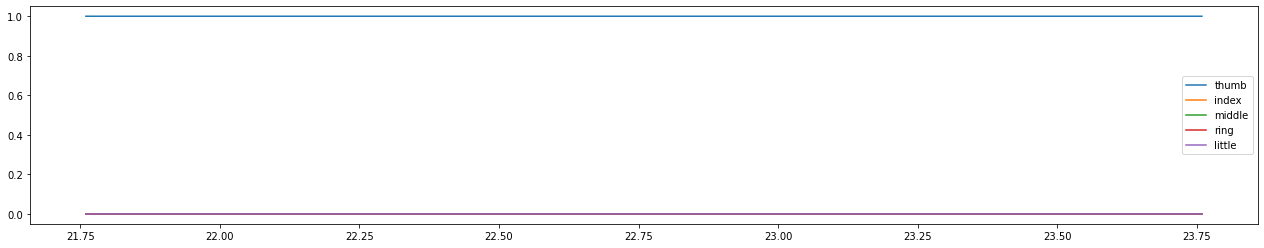

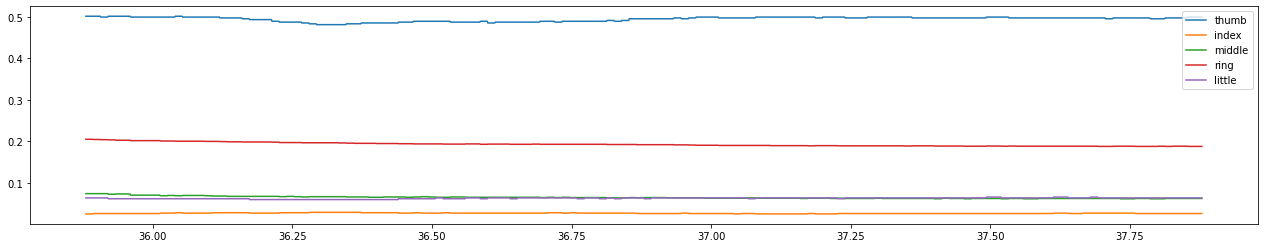

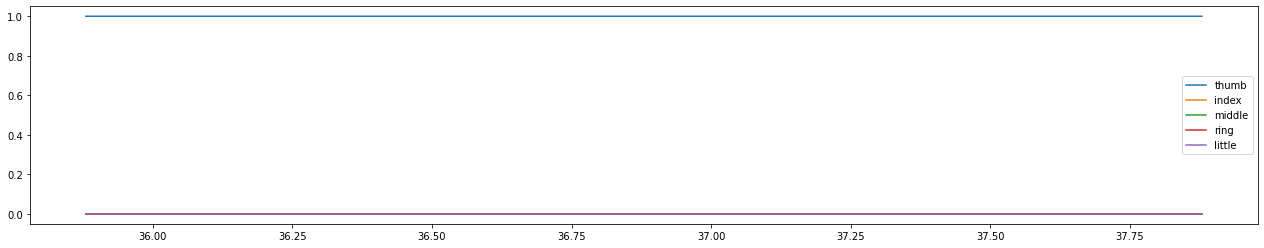

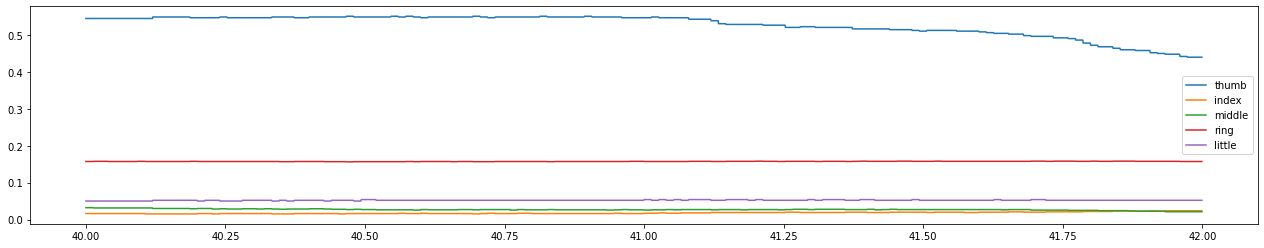

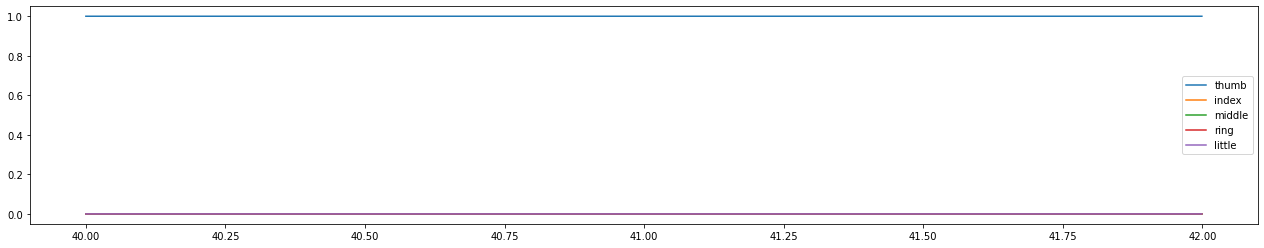

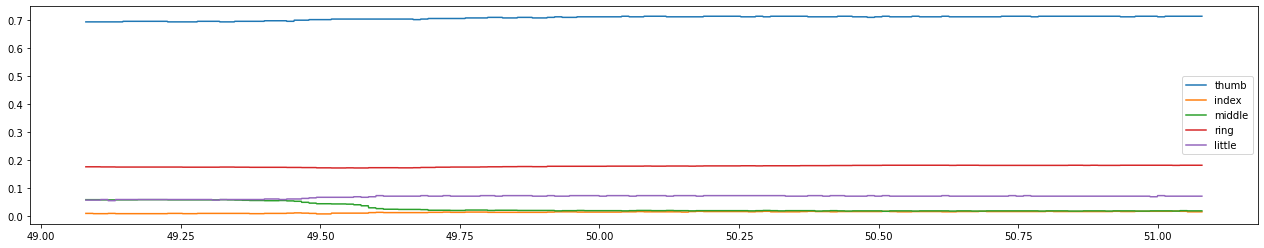

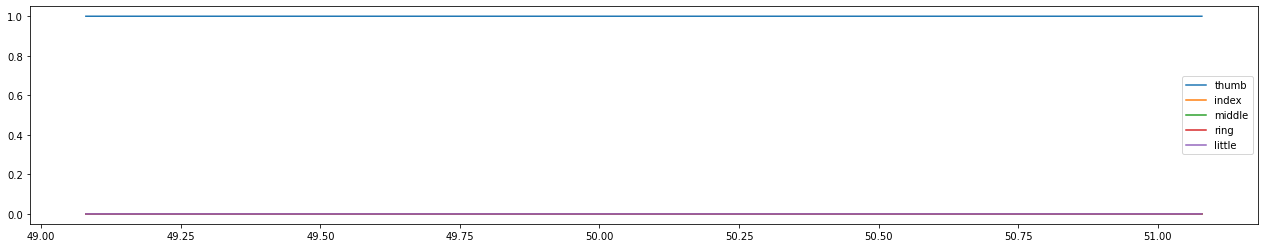

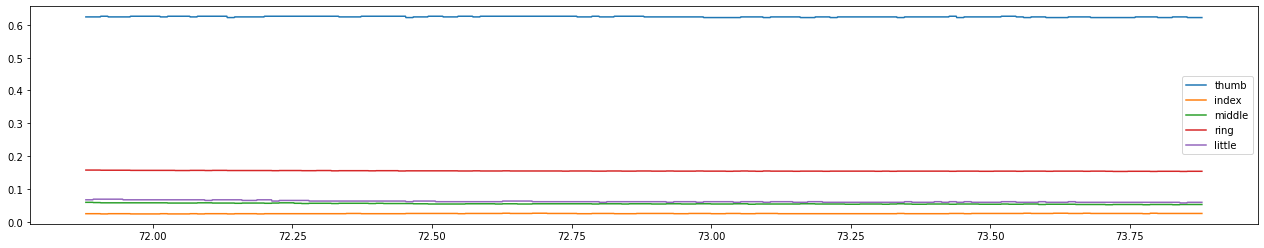

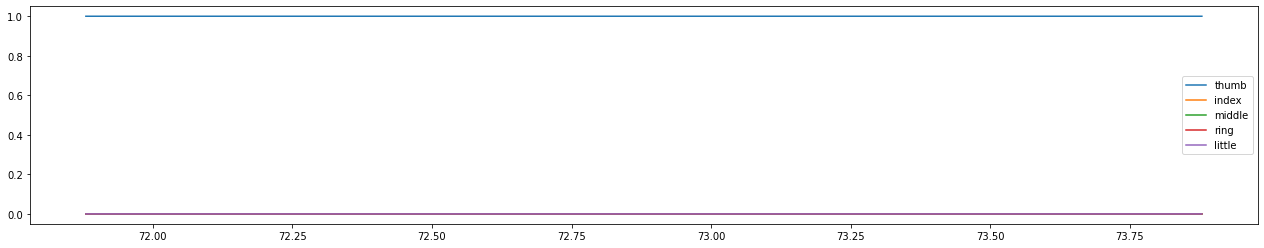

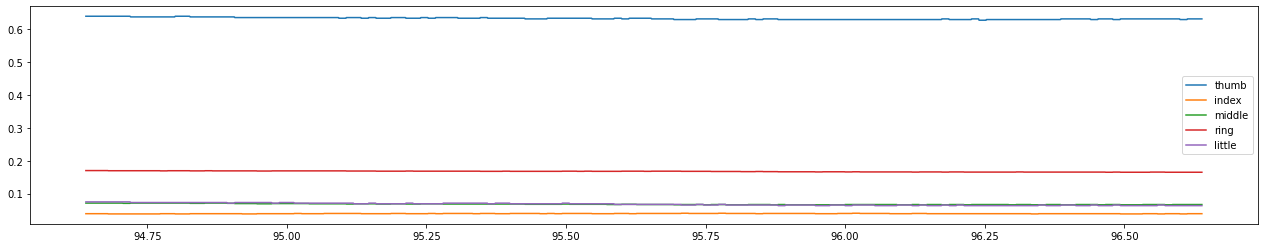

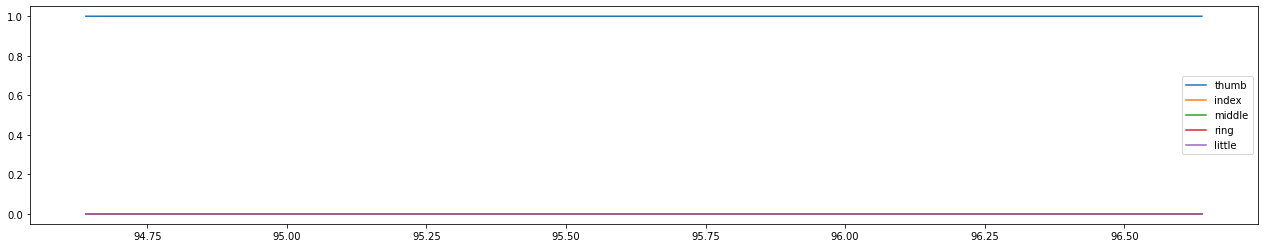

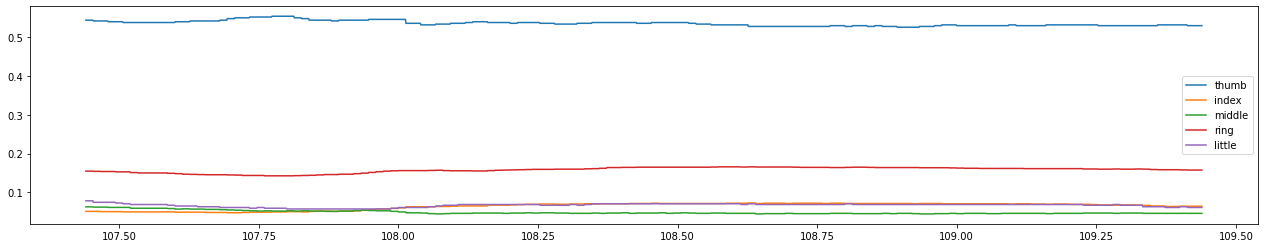

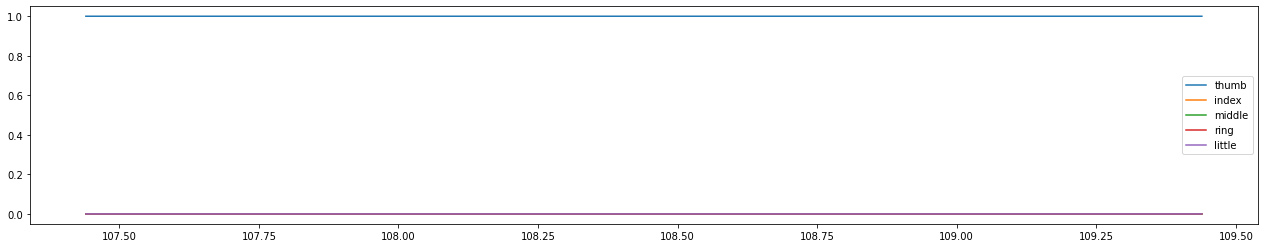

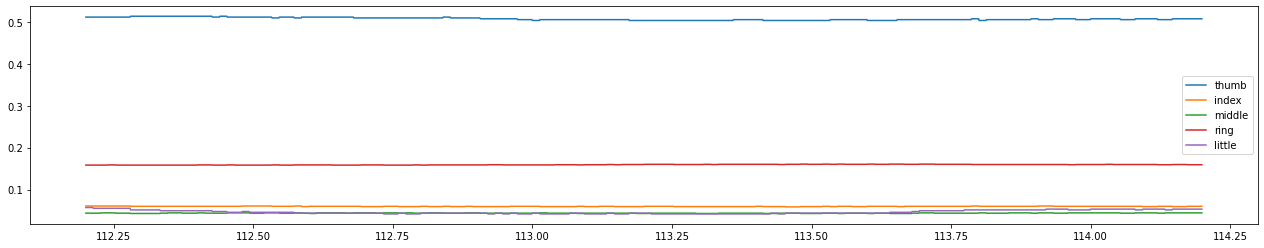

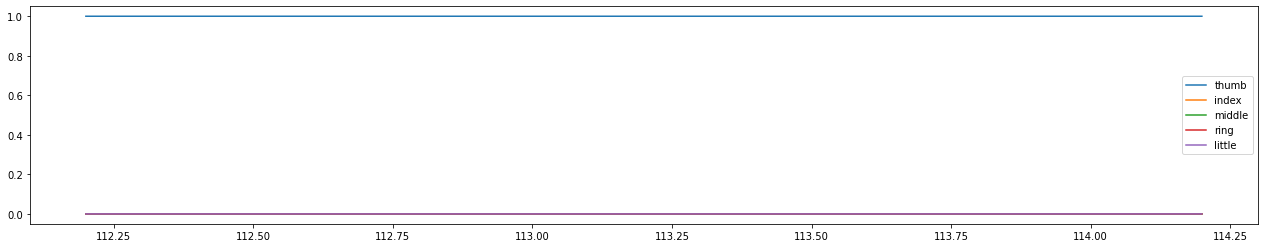

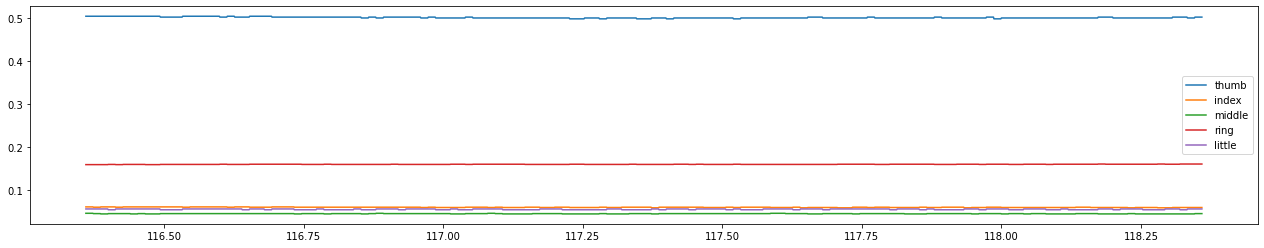

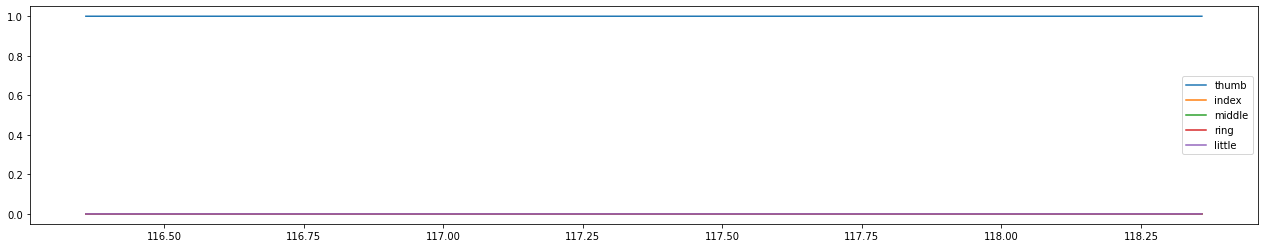

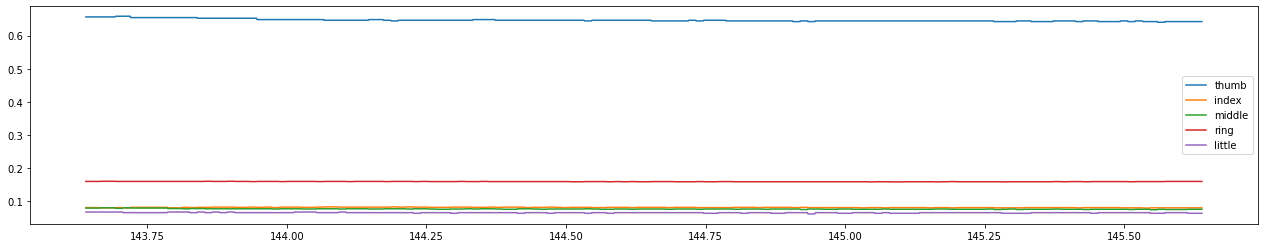

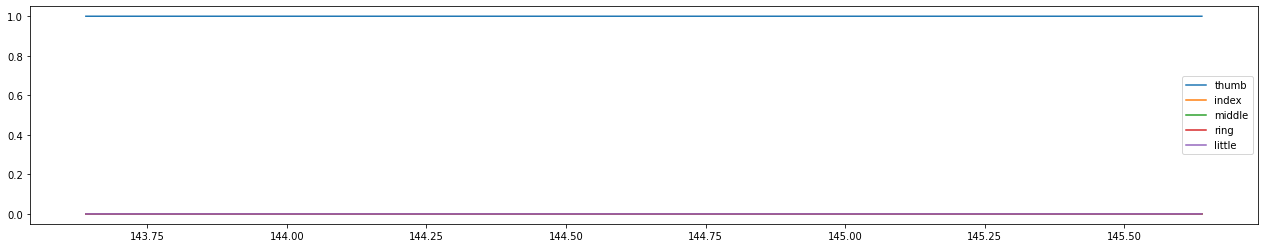

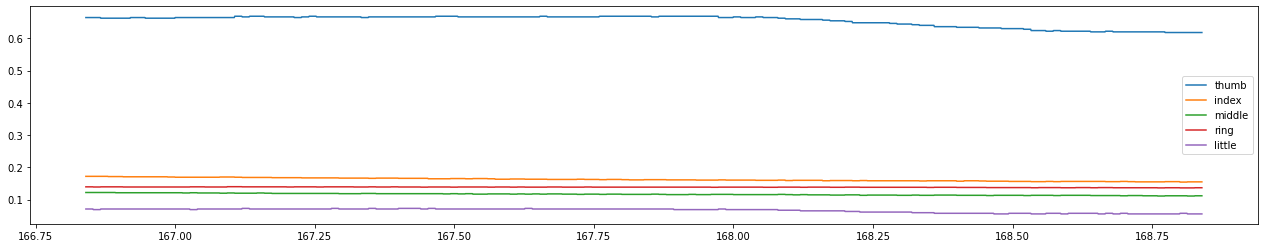

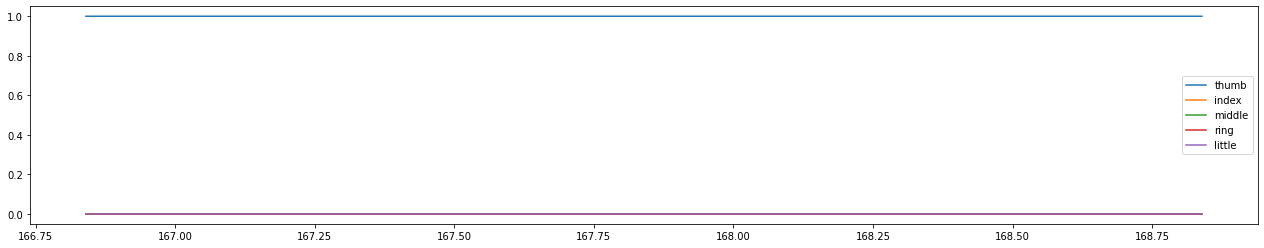

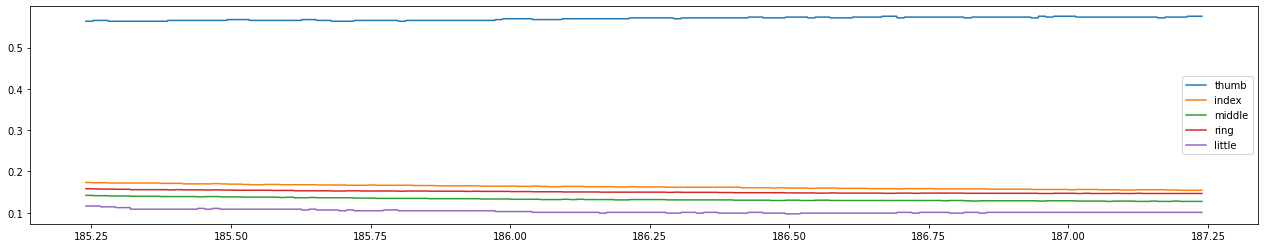

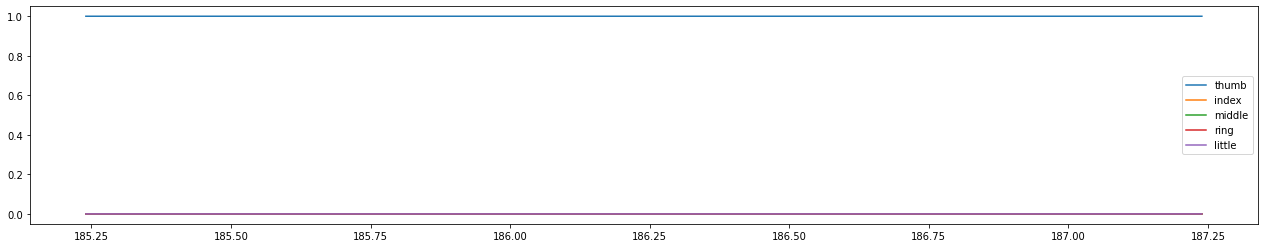

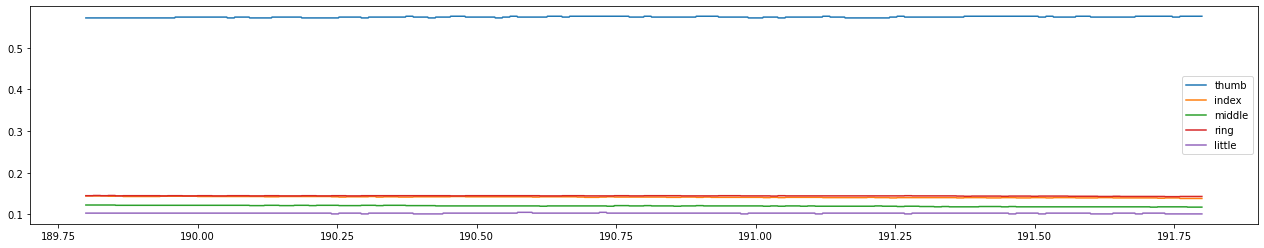

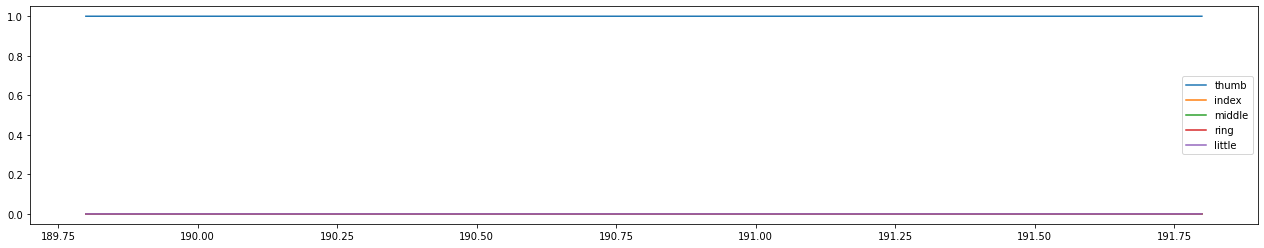

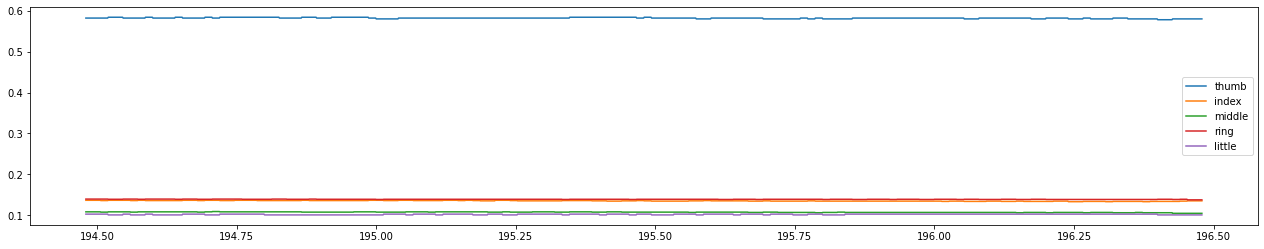

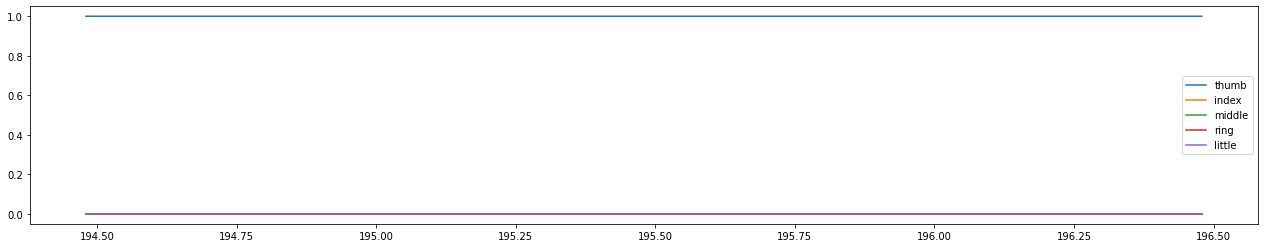

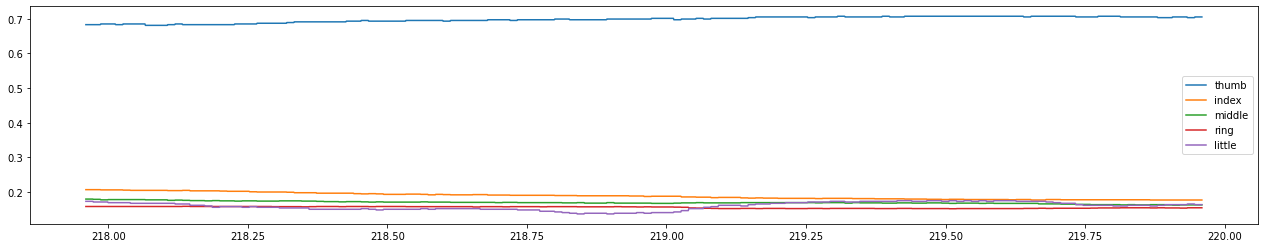

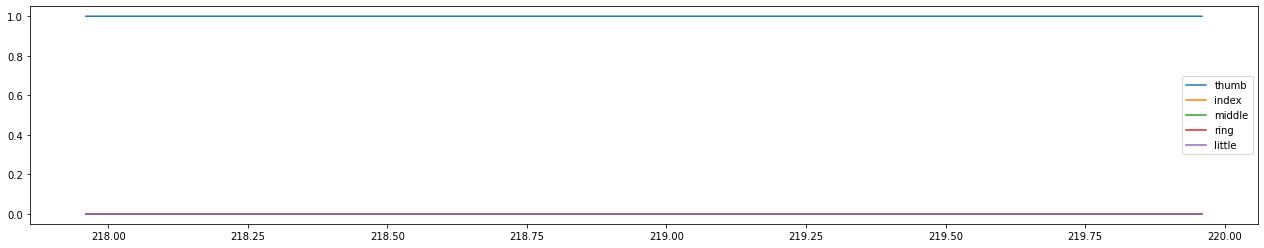

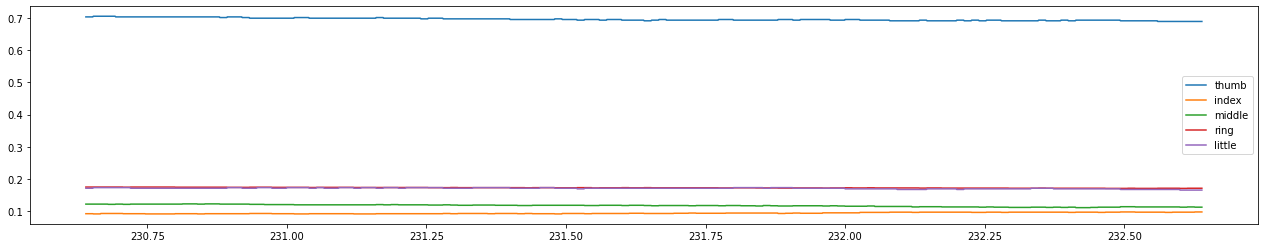

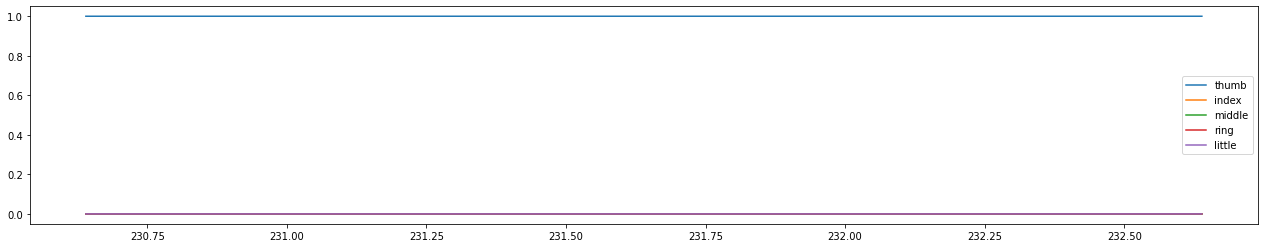

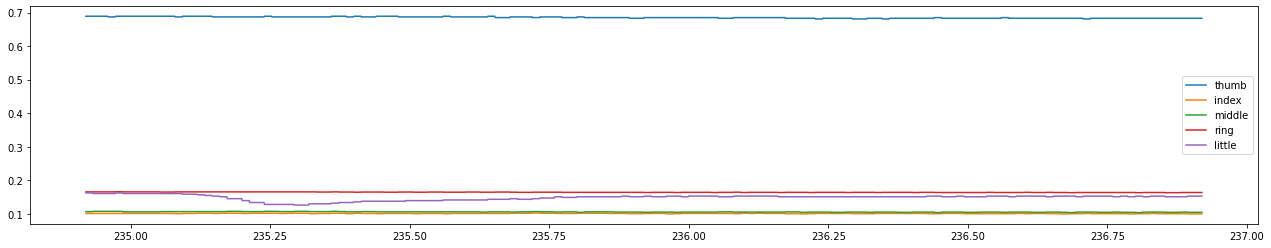

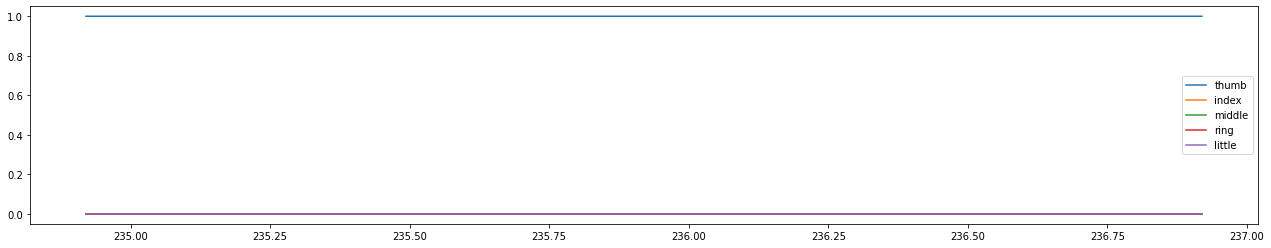

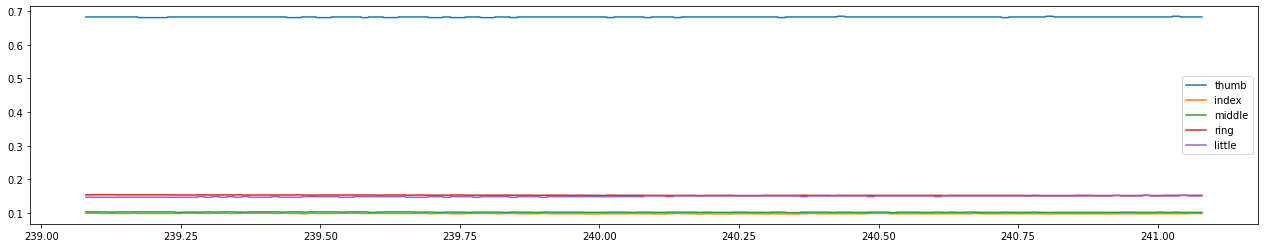

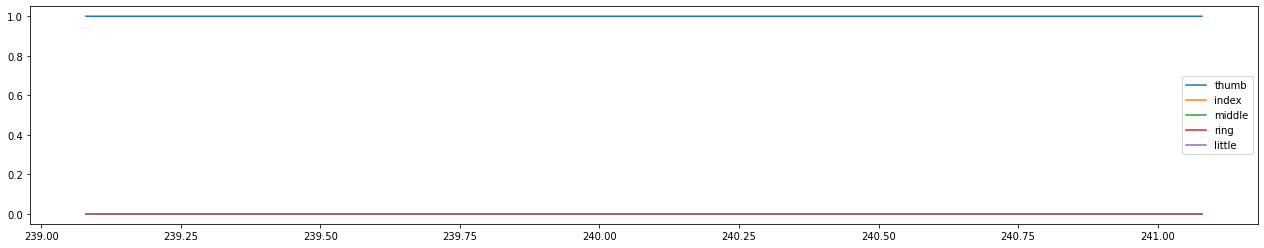

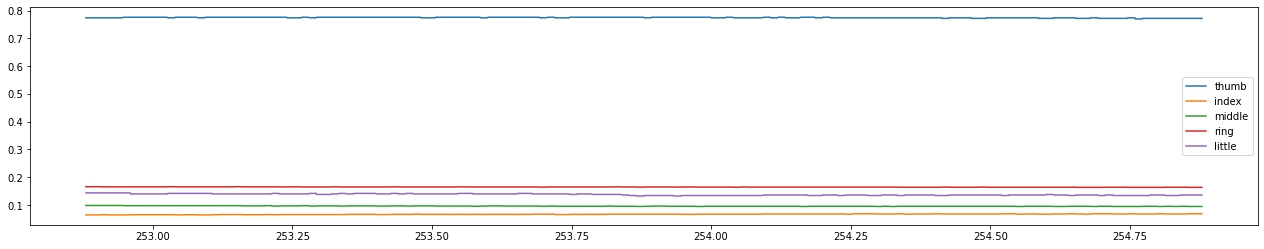

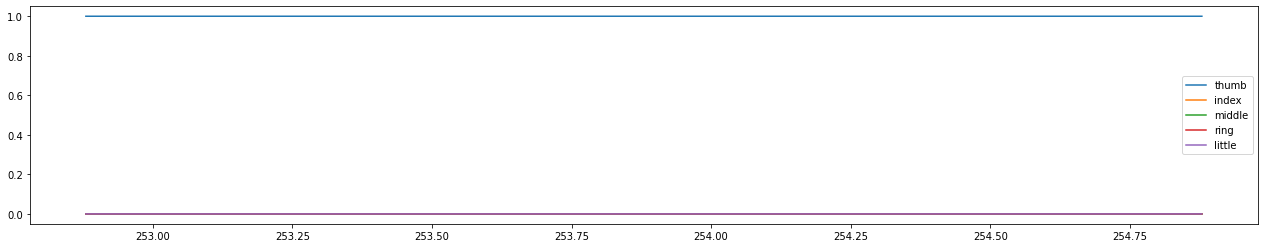

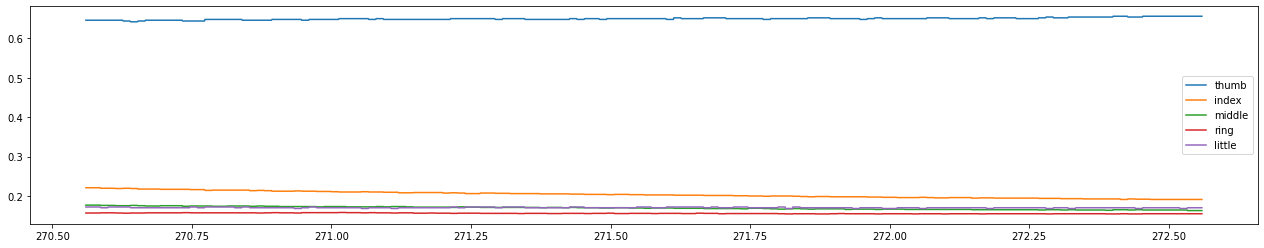

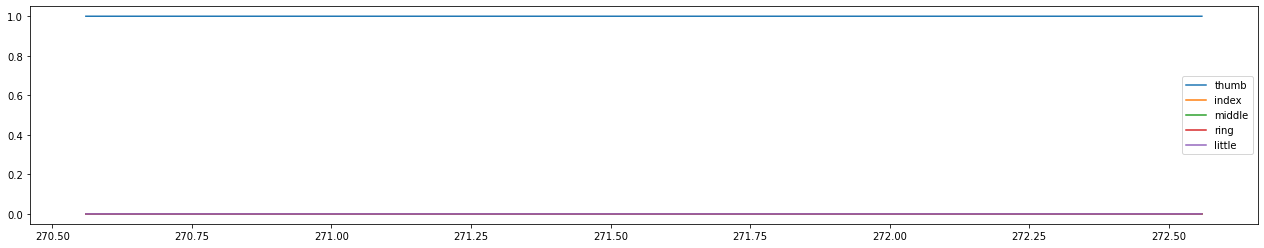

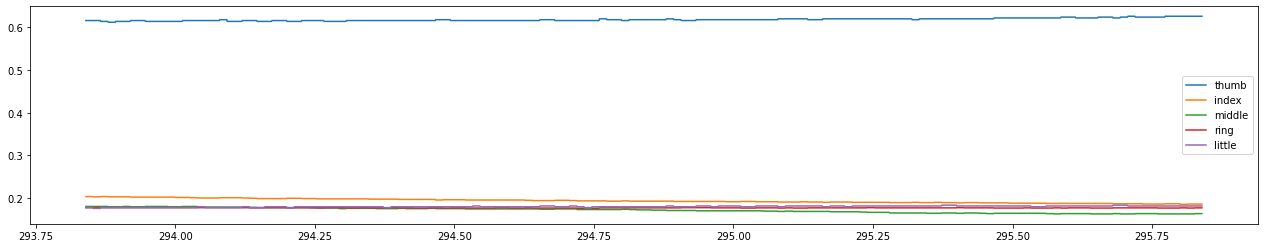

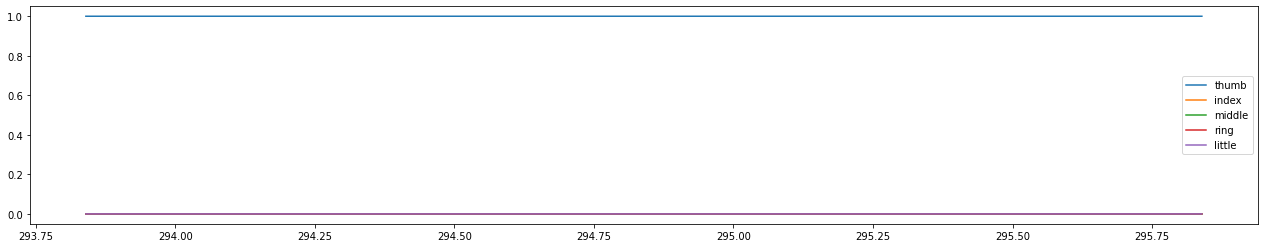

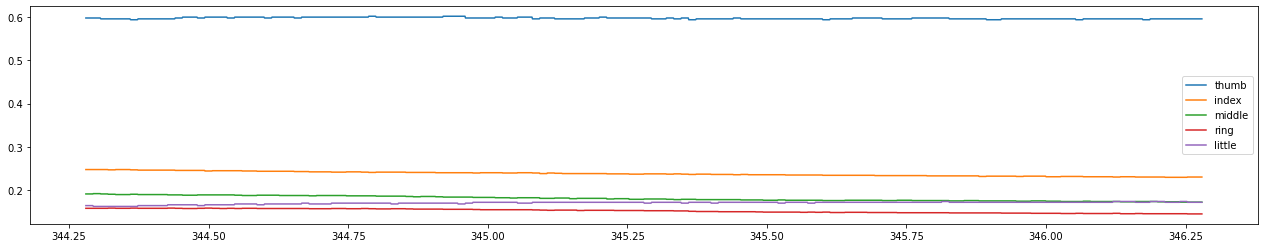

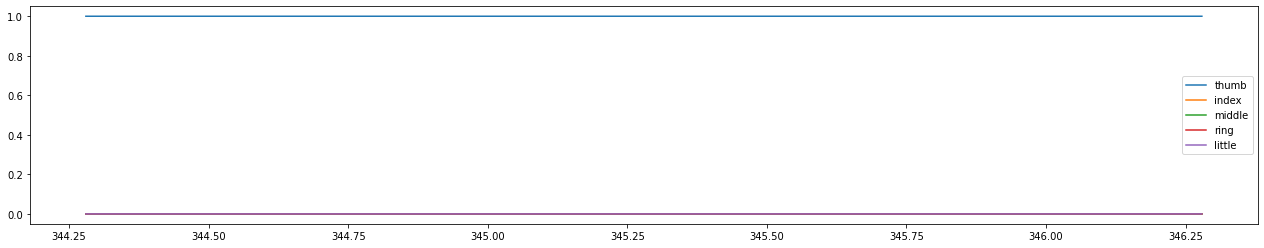

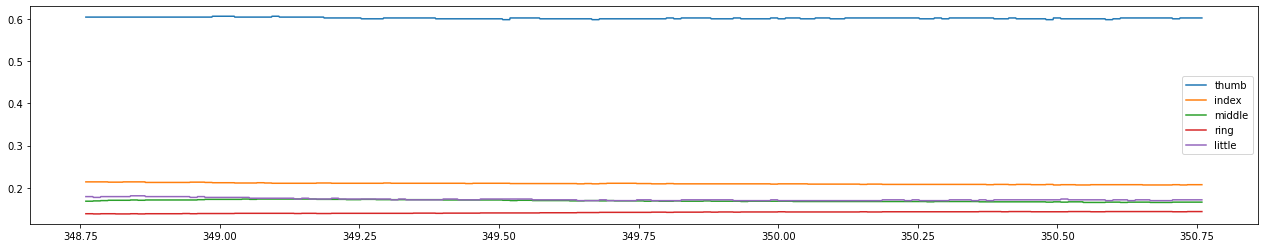

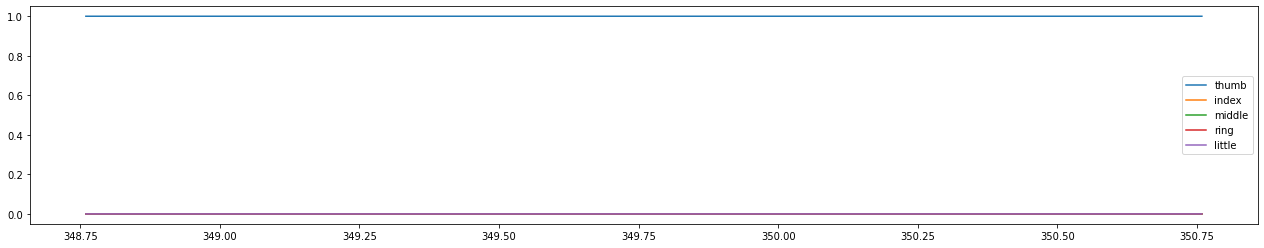

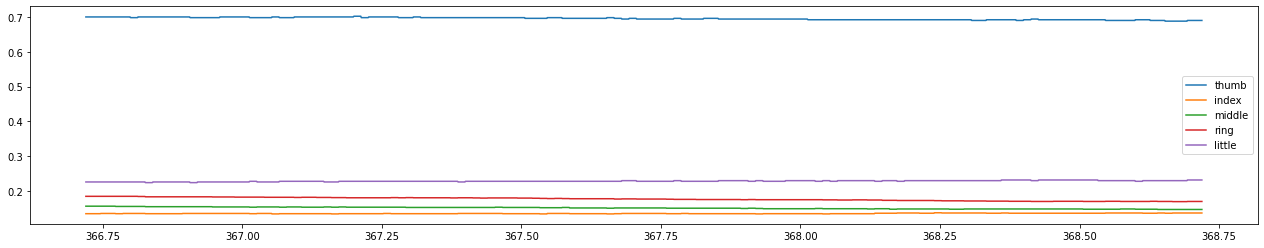

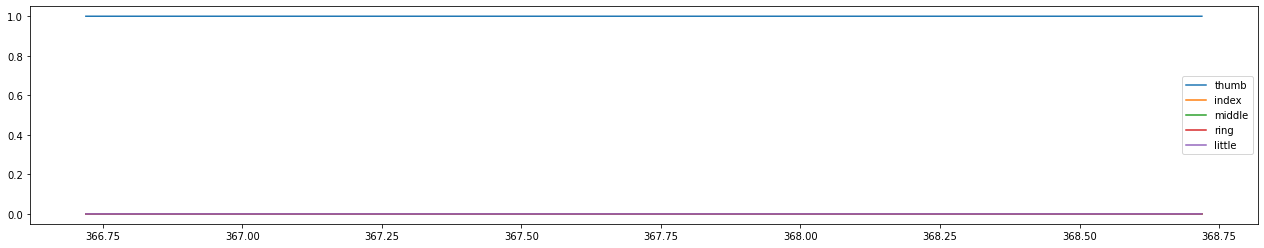

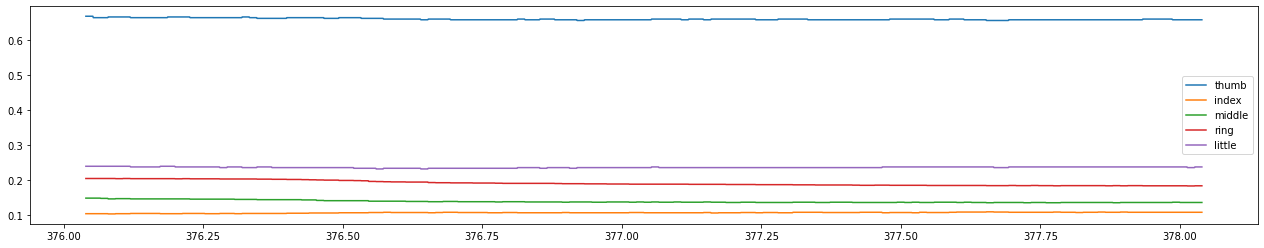

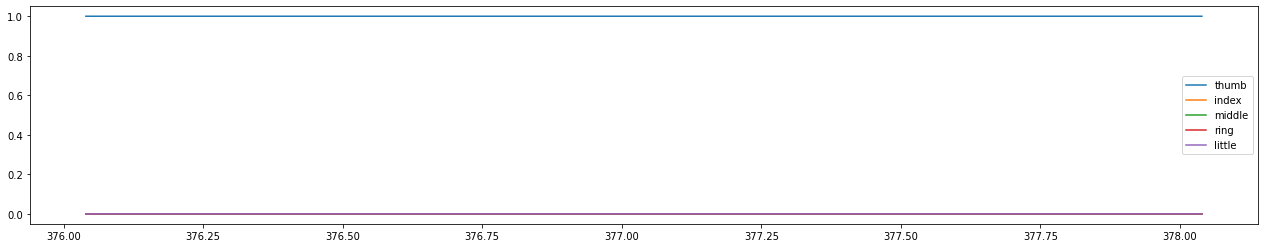

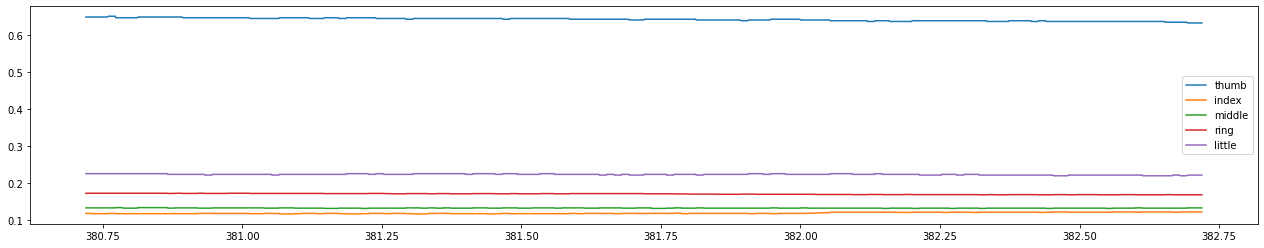

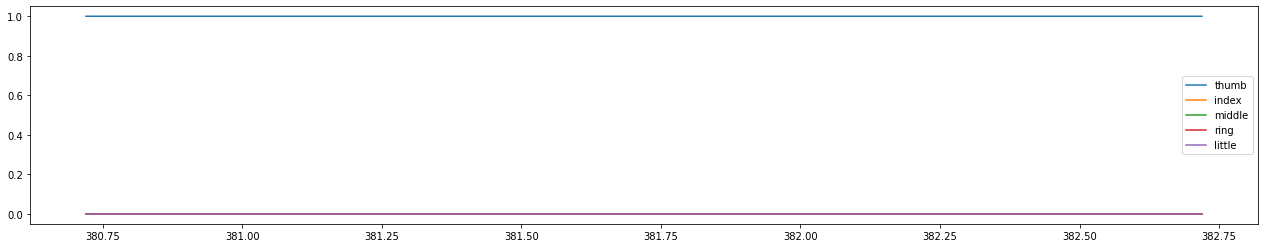

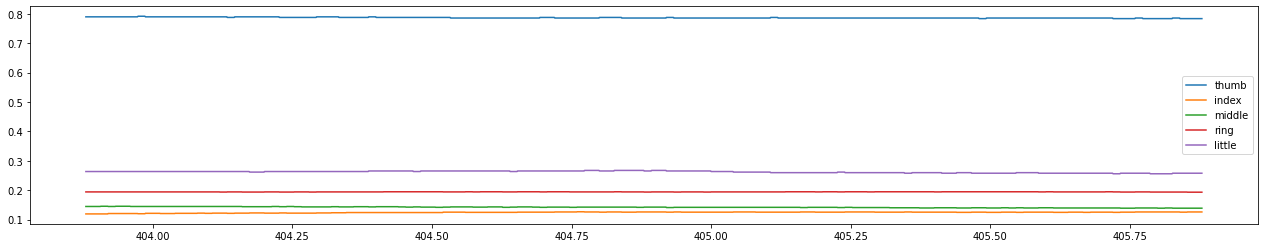

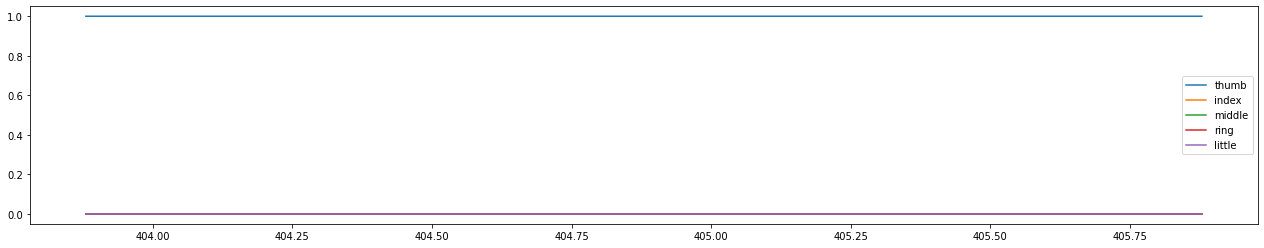

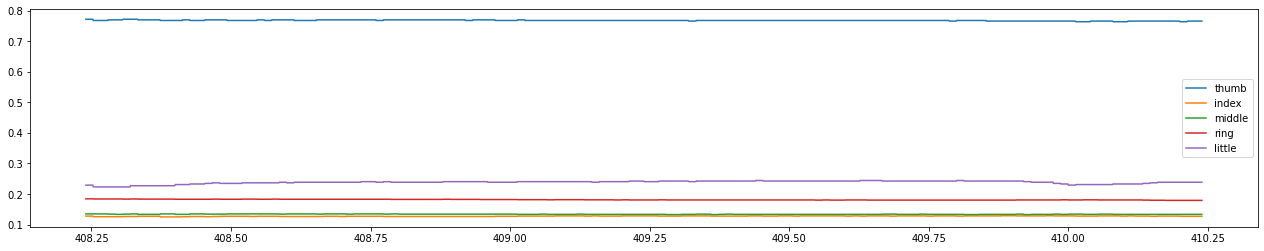

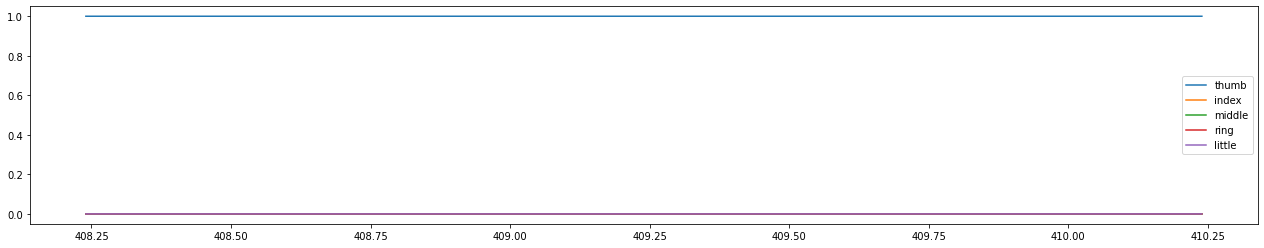

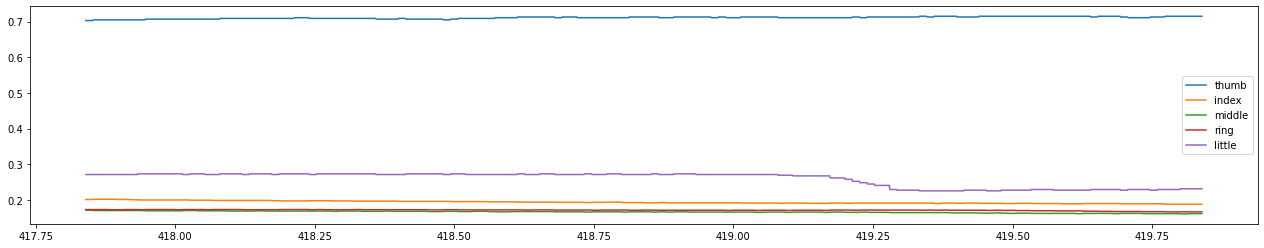

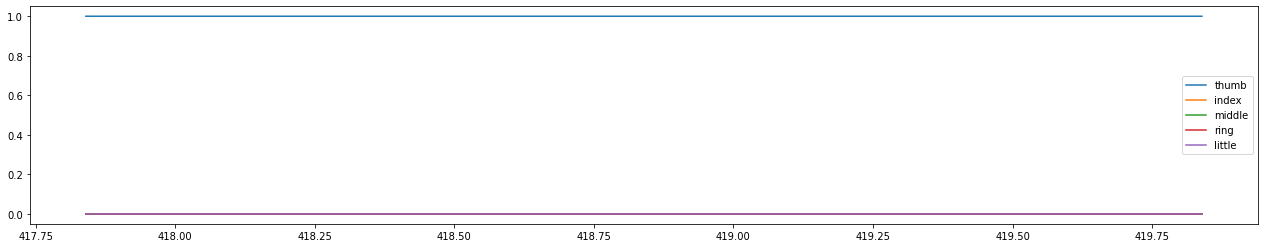

In [191]:
df_plot = df_fixed_size[df_fixed_size['CH62']==3].iloc[0:2400]

for i in range(0,30):
    df_plot = df_fixed_size[df_fixed_size['CH62']==3].iloc[i*2400:i*2400+2400]


    # Change in Paradigm Info over time
    plt.figure(figsize=(22,4 ))
    plt.plot(df_plot['CH1'], df_plot['CH63'], label='thumb')
    plt.plot(df_plot['CH1'], df_plot['CH64'], label='index')
    plt.plot(df_plot['CH1'], df_plot['CH65'], label='middle')
    plt.plot(df_plot['CH1'], df_plot['CH66'], label='ring')
    plt.plot(df_plot['CH1'], df_plot['CH67'], label='little')
    plt.legend()
    plt.show() 

    # Change in Paradigm Info over time
    plt.figure(figsize=(22,4 ))
    plt.plot(df_plot['CH1'], df_plot['thumb'], label='thumb')
    plt.plot(df_plot['CH1'], df_plot['index'], label='index')
    plt.plot(df_plot['CH1'], df_plot['middle'], label='middle')
    plt.plot(df_plot['CH1'], df_plot['ring'], label='ring')
    plt.plot(df_plot['CH1'], df_plot['little'], label='little')
    plt.legend()
    plt.show() 

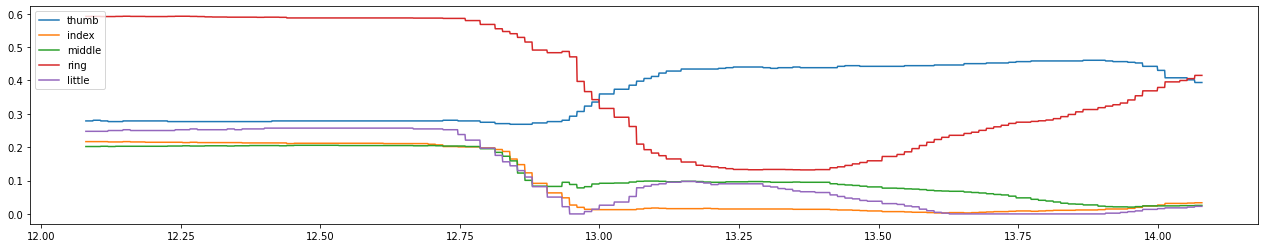

In [186]:
# Change in Paradigm Info over time
plt.figure(figsize=(22,4 ))
plt.plot(df_plot['CH1'], df_plot['CH63'], label='thumb')
plt.plot(df_plot['CH1'], df_plot['CH64'], label='index')
plt.plot(df_plot['CH1'], df_plot['CH65'], label='middle')
plt.plot(df_plot['CH1'], df_plot['CH66'], label='ring')
plt.plot(df_plot['CH1'], df_plot['CH67'], label='little')
plt.legend()
plt.show() 

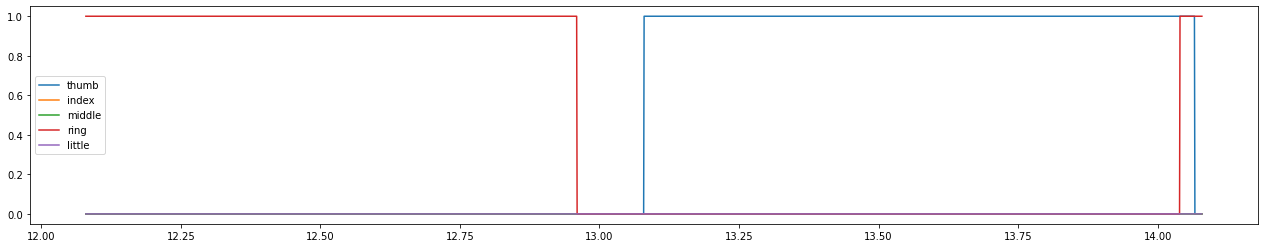

In [187]:
# Change in Paradigm Info over time
plt.figure(figsize=(22,4 ))
plt.plot(df_plot['CH1'], df_plot['thumb'], label='thumb')
plt.plot(df_plot['CH1'], df_plot['index'], label='index')
plt.plot(df_plot['CH1'], df_plot['middle'], label='middle')
plt.plot(df_plot['CH1'], df_plot['ring'], label='ring')
plt.plot(df_plot['CH1'], df_plot['little'], label='little')
plt.legend()
plt.show() 

In [42]:
train_columns = [f'CH{i}' for i in range(2, 62)]
x_train, x_test, y_train, y_test = train_test_split(df_ecog[train_columns], df_ecog['CH62'], test_size = 0.15, shuffle=True, random_state=0)
x_train, x_valid, y_train, y_valid = train_test_split(x_train, y_train, test_size = 0.2, shuffle=True, random_state=1)

In [48]:
df_pred = pd.DataFrame(df_ecog['CH62'])
# df_pred['price'] = train['price']
df_pred.head()

,CH62
0,0.0
1,0.0
2,0.0
3,0.0
4,0.0


In [51]:
#Logistic Regression
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(x_train,y_train)

df_pred['LR_pred'] = pd.DataFrame(lr.predict(x_test))
print(lr.score(x_train,y_train))

0.5649581177344131


In [52]:
df_pred

,CH62,LR_pred
0,0.0,0.0
1,0.0,0.0
2,0.0,0.0
3,0.0,0.0
4,0.0,0.0
...,...,...
507020,0.0,NaN
507021,0.0,NaN
507022,0.0,NaN
507023,0.0,NaN
